<a href="https://colab.research.google.com/github/sureshmecad/Higgs-Boson-Decay-TMLC/blob/main/3_Higgs_Boson_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project 3**

#### **Higgs Boson**

##### **Company :** The Machine Learning Company

##### **Role :** Machine Learning Intern

##### **Author :** Anuganti Suresh

#### **Problem Statement**

- The task is to **classify** whether **signal or background**

#### **Dataset Information:**

- **Number of Rows :** 250000

- **Number of Columns :** 33

|Variable          |Description         |
|------------------|--------------------|
|EventId           |An unique integer identifier of the event|
|DER_mass_MMC      |The estimated mass mH of the Higgs boson candidate, obtained through a probabilistic phase space integration.|
|DER_mass_transverse_met_lep |The transverse mass between the missing transverse energy and the lepton|
|DER_mass_vis      |The invariant mass of the hadronic tau and the lepton.|
|DER_pt_h          |The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton and the missing transverse energy vector.|
|DER_deltaeta_jet_jet|The absolute value of the pseudorapidity separation between the two jets (undefined if PRI_jet_num ≤ 1).|
|DER_mass_jet_jet |The invariant mass of the two jets (undefined if PRI_jet_num ≤ 1).|
|DER_prodeta_jet_jet	|The product of the pseudorapidities of the two jets (undefined if PRI_jet_num ≤ 1).|
|DER_deltar_tau_lep	|The R separation between the hadronic tau and the lepton.
|DER_pt_tot	|The modulus of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI_jet_num ≥) and the subleading jet (if PRI jet num = 2) (but not of any additional jets).|
|DER_sum_pt	|The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num ≥ 1) and the subleading jet (if PRI jet num = 2) and the other jets (if PRI jet num = 3).|
|DER_pt_ratio_lep_tau	|The ratio of the transverse momenta of the lepton and the hadronic tau.|
|DER_met_phi_centrality	|The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton.|
|DER_lep_eta_centrality	|The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI_jet_num ≤ 1).|
|PRI_tau_pt	|The transverse momentum p2x+p2y−−−−−−√ of the hadronic tau.|
|PRI_tau_eta	|The pseudorapidity η of the hadronic tau.|
|PRI_tau_phi	|The azimuth angle ϕ of the hadronic tau.|
|PRI_lep_pt	|The transverse momentum p2x+p2y−−−−−−√ of the lepton (electron or muon).|
|PRI_lep_eta	|The pseudorapidity η of the lepton.|
|PRI_lep_phi	|The azimuth angle ϕ of the lepton.|
|PRI_met	|The missing transverse energy E→missT|
|PRI_met_phi	|The azimuth angle ϕ of the mssing transverse energy|
|PRI_met_sumet	|The total transverse energy in the detector.|
|PRI_jet_num	|The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have been capped at 3).|
|PRI_jet_leading_pt	|The transverse momentum p2x+p2y−−−−−−√ of the leading jet, that is the jet with largest transverse momentum (undefined if PRI_jet_num = 0).|
|PRI_jet_leading_eta	|The pseudorapidity η of the leading jet (undefined if PRI jet num = 0).|
|PRI_jet_leading_phi	|The azimuth angle ϕ of the leading jet (undefined if PRI jet num = 0).|
|PRI_jet_subleading_pt	|The transverse momentum p2x+p2y−−−−−−√ of the leading jet, that is, the jet with second largest transverse momentum (undefined if PRI_jet_num ≤ 1).|
|PRI_jet_subleading_eta	|The pseudorapidity η of the subleading jet (undefined if PRI_jet_num ≤ 1).|
|PRI_jet_subleading_phi	|The azimuth angle ϕ of the subleading jet (undefined if PRI_jet_num ≤ 1).|
|PRI_jet_all_pt	|The scalar sum of the transverse momentum of all the jets of the events.|
|Weight	|The event weight wi|
|Label	|The event label (string) yi ∈ {s,b} (**s** for **signal**, **b** for **background**).
|KaggleSet	|String specifying to which Kaggle set the event belongs : ”t”:training, ”b”:public leaderboard, ”v”:private leaderboard,”u”:unused.|
|KaggleWeight	|Weight normalised within each Kaggle dataset.|

### Table of Contents

* [1) Import Libraries](#1)

* [2) Import Data And Preprocessing](#2)

* [3) Exploratory Data Analysis](#3)

 * [3.1) Visualizations](#3.1)

   * [3.1.1 Univariate Analysis](#3.1.1)
   * [3.1.2 Bivariate Analysis](#3.1.2)
   * [3.1.3 Multivariate Analysis](#3.1.3)

 * [3.2) Relation between Features](#3.2)

   * [3.2.1 The correlation between the continuos variables](#3.2.1)
   * [3.2.2) The correlation between this continuos features and the target](#3.2.1)

 * [3.3) Skewness and Kurtosis](#3.3)

 * [4) Feature Engineering](#4)

   * [4.1) Missing Values](#4.1)
   * [4.2) Outliers](#4.2)
   * [4.3) Label Encoding](#4.3)
   * [4.4) Scaling](#4.4)

* [5) Modelling](#5)

* [6) Model Evaluation](#6)

* [7) Hyperparameter Tuning](#7)

* [8) Prediction](#8)



### **1) Import Libraries**

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [58]:
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance
from sklearn.naive_bayes import GaussianNB

#### **2) Import Data And Preprocessing**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Higgs = pd.read_csv("/content/drive/MyDrive/TMLC/Higgs-Boson.zip")

In [5]:
display(Higgs.head(3))
display(Higgs.tail(3))

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
249997,349997,105.457,60.526,75.839,39.757,-999.0,-999.0,-999.0,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.8,-0.166,-999.0,-999.0,-999.0,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.0,-999.0,-999.0,3.365,13.504,55.859,0.999,1.414,-999.0,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,1.681611,b
249999,349999,-999.000,72.756,70.831,7.479,-999.0,-999.0,-999.0,2.025,7.479,83.240,0.936,-1.411,-999.0,43.003,1.685,2.653,40.236,1.490,0.637,40.729,-1.596,99.405,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,1.877474,b


In [6]:
Higgs.shape

(250000, 33)

In [7]:
original = Higgs.copy()

In [8]:
Higgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [9]:
Higgs.drop('EventId', axis=1, inplace=True)

### **3) EDA(Exploratory Data Analysis)**

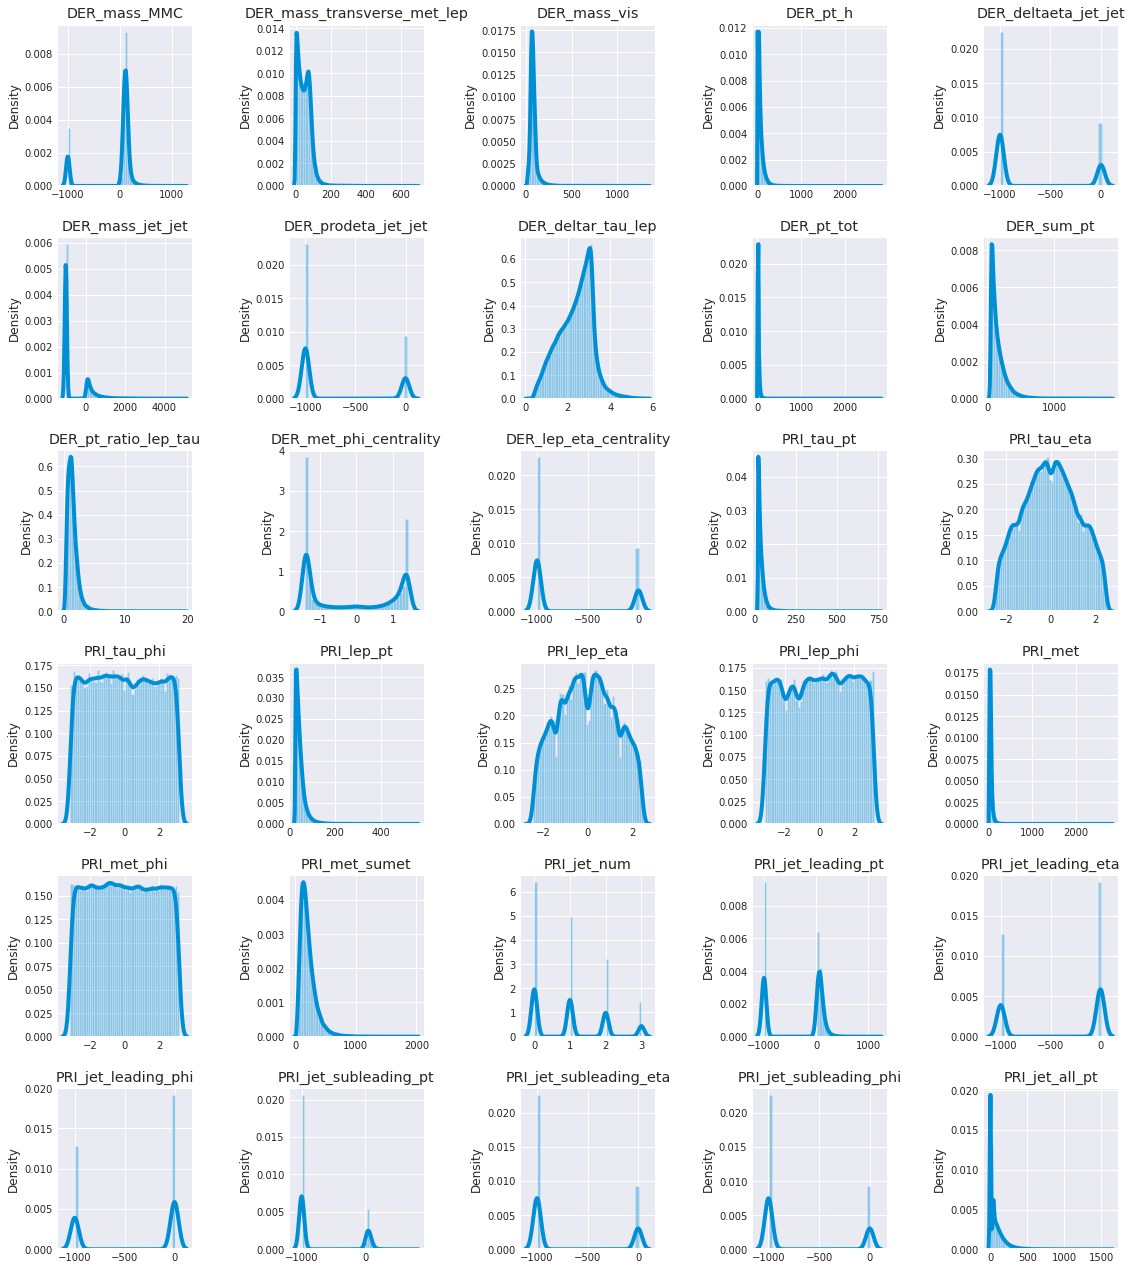

In [ ]:
fig, ax = plt.subplots(6,5, figsize=(16, 18))
ax = ax.flatten()
for i in range(30):
    sns.distplot(Higgs.iloc[:,i].values, ax=ax[i])
    ax[i].set_title(Higgs.columns[i])
fig.tight_layout(pad=2.0)

13 17


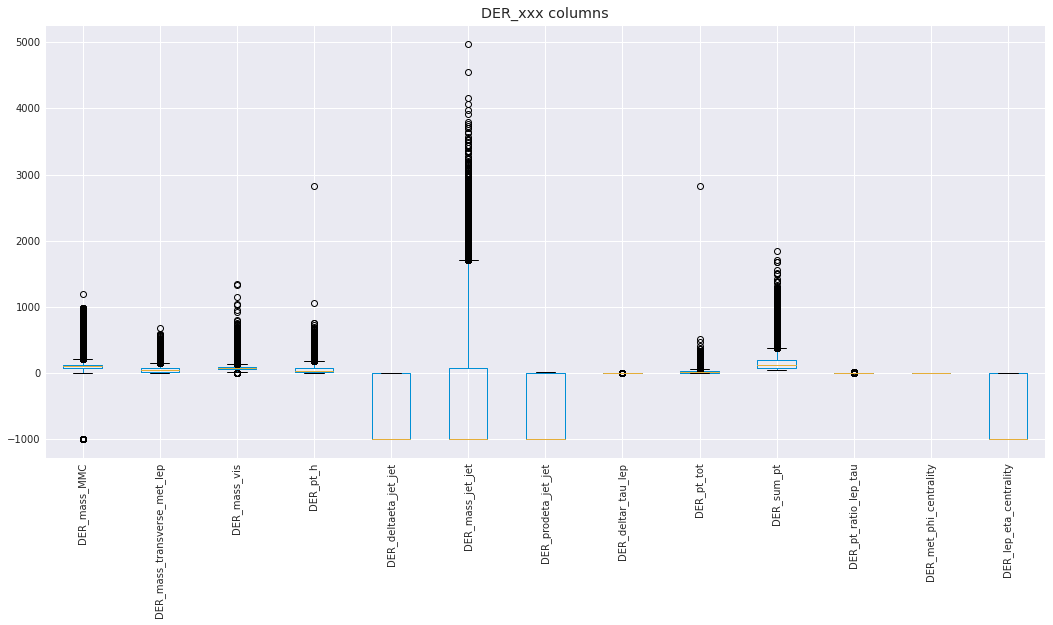

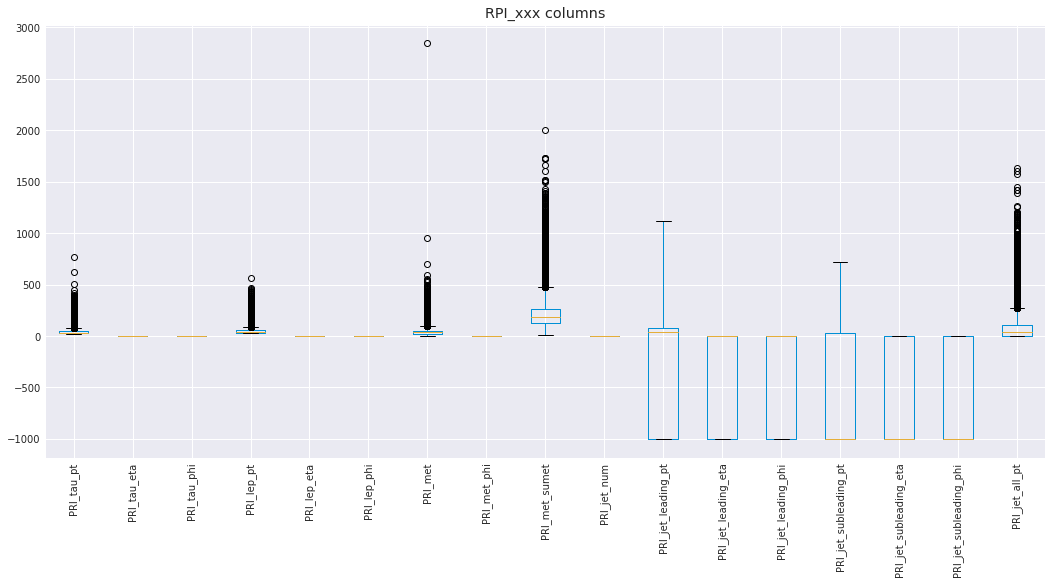

In [ ]:
# separate columns for further analysis
cols_der = [col for col in Higgs.columns if col.startswith('DER')]
cols_pri = [col for col in Higgs.columns if col.startswith('PRI')]

print(len(cols_der), len(cols_pri))

# plot only DER columns
Higgs[cols_der].plot(kind='box', figsize=(16, 8))
plt.xticks(rotation=90);
plt.title('DER_xxx columns')
plt.show()

# plot only PRI columns
Higgs[cols_pri].plot(kind='box', figsize=(16, 8))
plt.xticks(rotation=90);
plt.title('RPI_xxx columns')
plt.show()

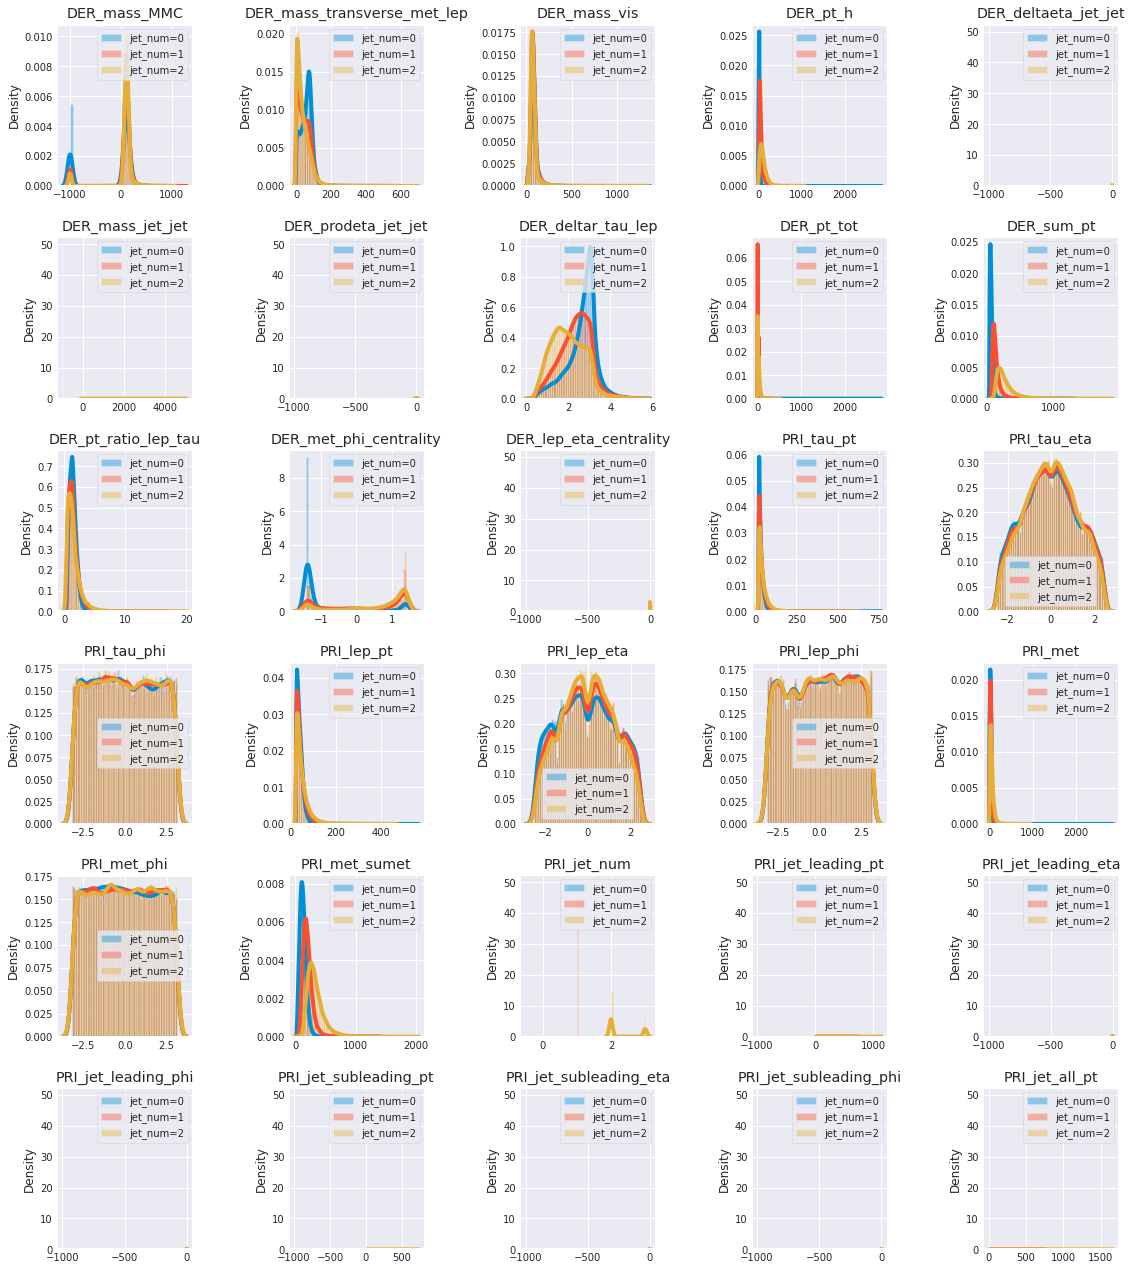

In [ ]:
fig, ax = plt.subplots(6,5, figsize=(16, 18))
ax = ax.flatten()
for i in range(30):
    sns.distplot(Higgs.loc[Higgs['PRI_jet_num']==0].iloc[:,i].values, ax=ax[i], label='jet_num=0')
    sns.distplot(Higgs.loc[Higgs['PRI_jet_num']==1].iloc[:,i].values, ax=ax[i], label='jet_num=1')
    sns.distplot(Higgs.loc[Higgs['PRI_jet_num']>=2].iloc[:,i].values, ax=ax[i], label='jet_num=2')
    ax[i].set_title(Higgs.columns[i])
    ax[i].legend()
fig.tight_layout(pad=2.0)

### **target variable**

In [ ]:
Higgs['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

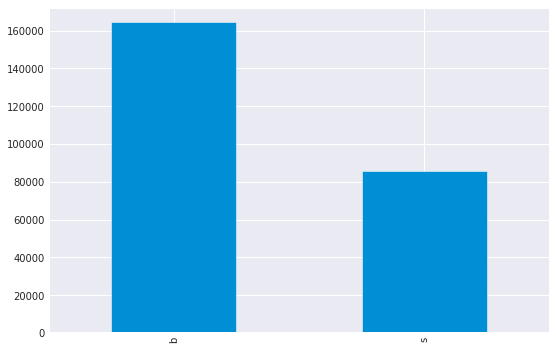

In [ ]:
plt.figure(figsize=(8,6))
Higgs['Label'].value_counts().plot(kind='bar');

In [10]:
Higgs['Label'] = Higgs['Label'].map({'b':1, 's':0})

In [ ]:
train_data_cols = Higgs.columns.tolist()
train_data_cols.sort()

print(train_data_cols)

['DER_deltaeta_jet_jet', 'DER_deltar_tau_lep', 'DER_lep_eta_centrality', 'DER_mass_MMC', 'DER_mass_jet_jet', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_met_phi_centrality', 'DER_prodeta_jet_jet', 'DER_pt_h', 'DER_pt_ratio_lep_tau', 'DER_pt_tot', 'DER_sum_pt', 'Label', 'PRI_jet_all_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_leading_pt', 'PRI_jet_num', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_subleading_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_lep_pt', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_tau_pt', 'Weight']


In [ ]:
# Look at the discrete number of jets first:

Higgs['PRI_jet_num'].value_counts()

0    99913
1    77544
2    50379
3    22164
Name: PRI_jet_num, dtype: int64

### **Features correlations with target variable**

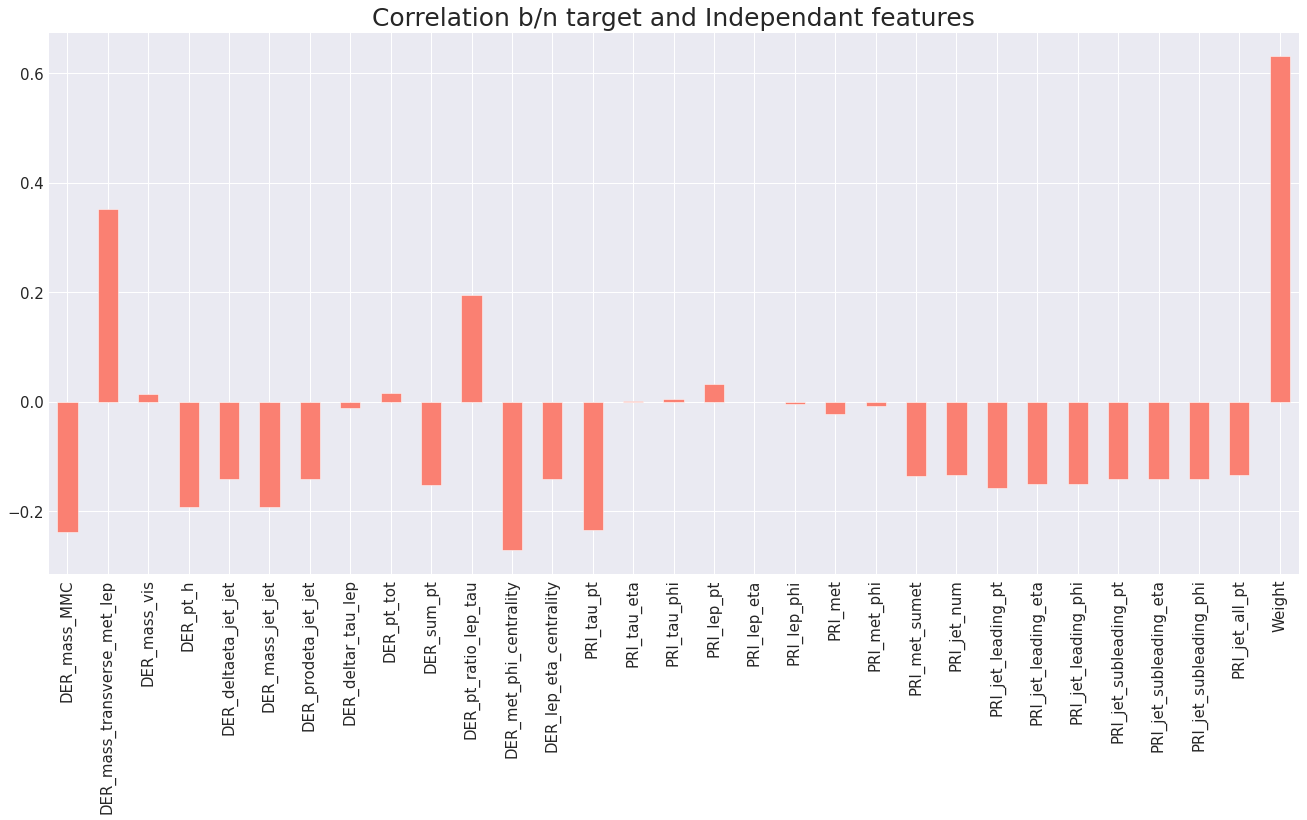

In [ ]:
a = Higgs.drop(['Label'], axis=1)
a.corrwith(Higgs['Label']).plot(kind='bar', figsize=(20,10), color=['salmon'])
plt.title('Correlation b/n target and Independant features', size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

- Below Features are the most correlated with target variable
 - DER_deltaeta_jet_jet
 - DER_mass_jet_jet
 - DER_prodeta_jet_jet
 - PRI_jet_subleading_pt
 - PRI_jet_subleading_eta
 - PRI_jet_subleading_phi

In [ ]:
Higgs.shape

(250000, 22)

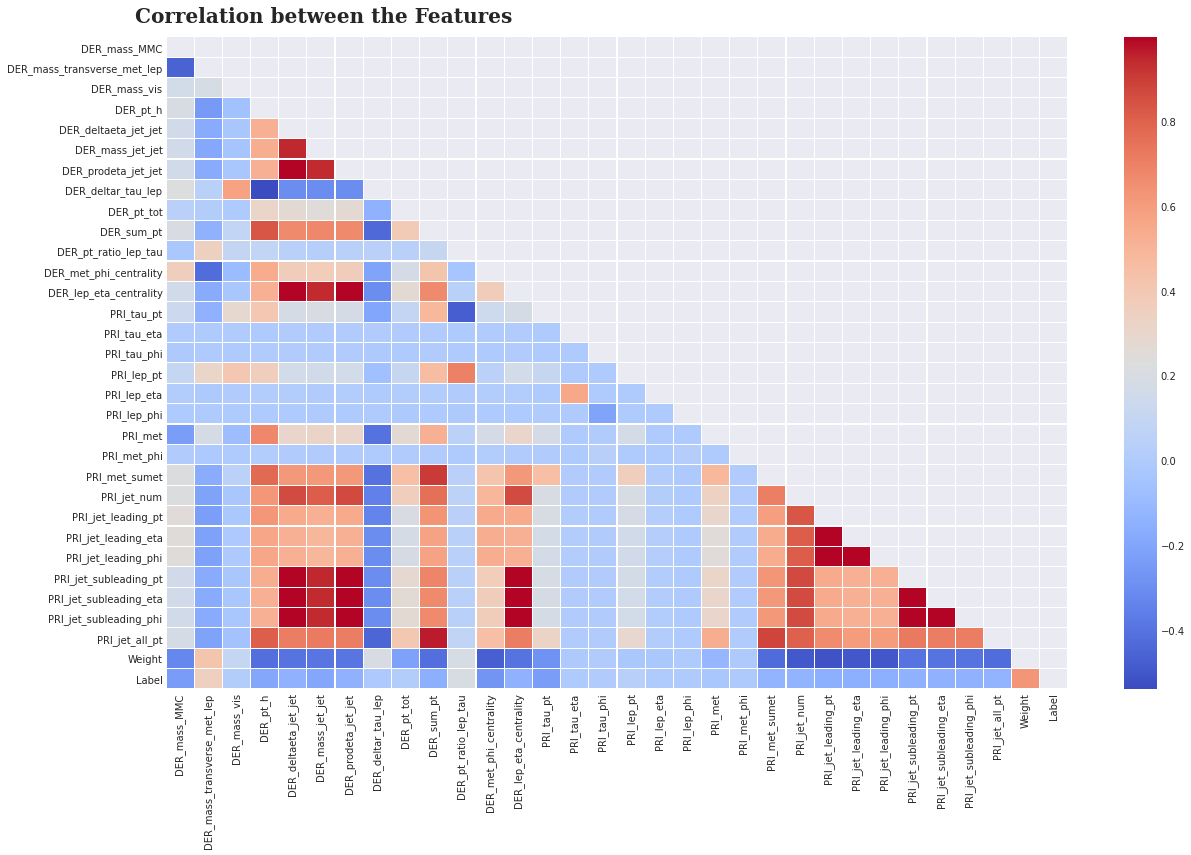

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
corr = Higgs.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax.text(-1.1, -0.7, 'Correlation between the Features', fontsize=20, fontweight='bold', fontfamily='serif')
sns.heatmap(corr, mask=mask, annot=False, fmt='.2f', linewidth=0.2, cbar=True, cmap='coolwarm');

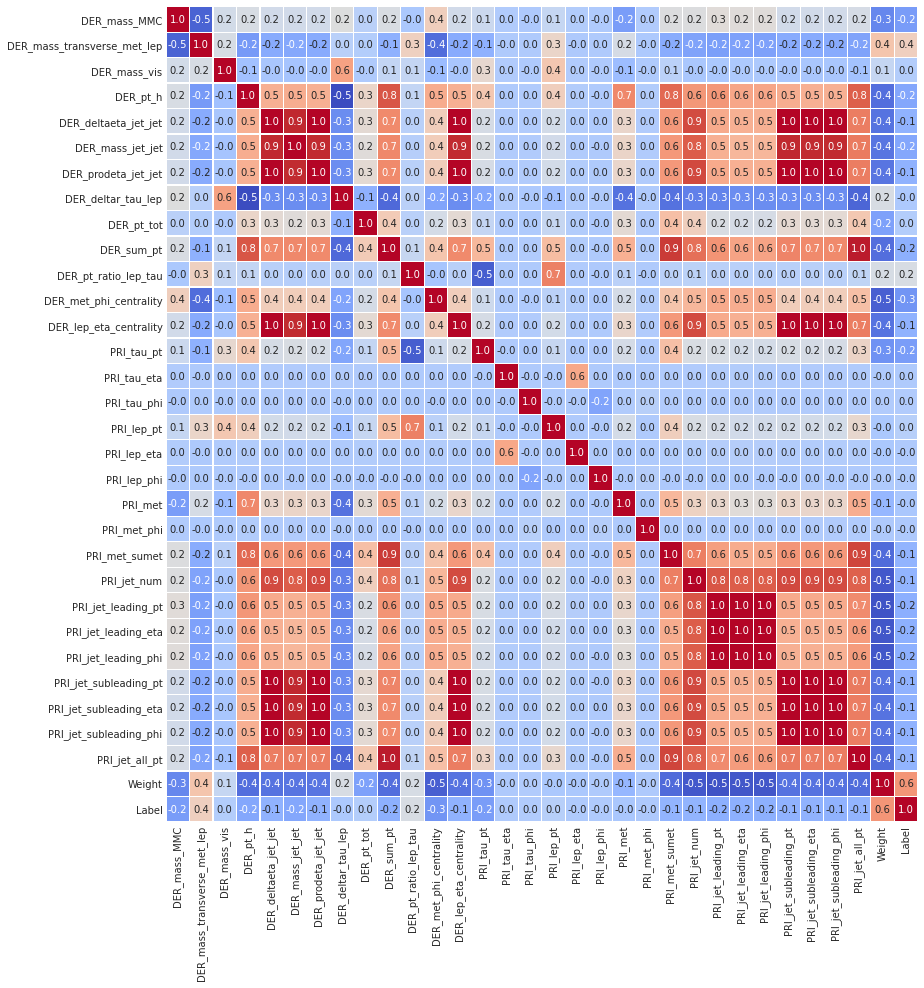

In [ ]:
# Pearson Correlation
plt.figure(figsize=(12,15))
sns.heatmap(Higgs.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

- **DER_lep_eta_centrality** is highly correlated with **DER_prodeta_jet_jet** (ρ = 0.99999) Rejected

- **DER_mass_jet_jet** is highly correlated with **DER_deltaeta_jet_jet** (ρ = 0.94604) Rejected

- **DER_prodeta_jet_jet** is highly correlated with **DER_mass_jet_jet** (ρ = 0.94444) Rejected

- **PRI_jet_all_pt** is highly correlated with **DER_sum_pt** (ρ = 0.96563) Rejected

- **PRI_jet_leading_eta** is highly correlated with **PRI_jet_leading_pt** (ρ = 0.9961) Rejected

- **PRI_jet_leading_phi** is highly correlated with **PRI_jet_leading_eta** (ρ = 0.99999) Rejected

- **PRI_jet_num** has 99913 / 40.0% zeros Zeros

- **PRI_jet_subleading_eta** is highly correlated with **PRI_jet_subleading_pt** (ρ = 0.99935) Rejected

- **PRI_jet_subleading_phi** is highly correlated with **PRI_jet_subleading_eta** (ρ = 0.99999) Rejected

- **PRI_jet_subleading_pt** is highly correlated with **DER_lep_eta_centrality** (ρ = 0.99935) Rejected

- **PRI_met_sumet** is highly correlated with **DER_sum_pt** (ρ = 0.90448) Rejected

In [ ]:
Higgs.drop(["DER_mass_vis", "DER_deltar_tau_lep", "DER_pt_tot", "PRI_tau_eta", "PRI_tau_phi", "PRI_lep_pt", "PRI_lep_eta", "PRI_lep_phi", "PRI_met", "PRI_met_phi"], axis=1, inplace=True)

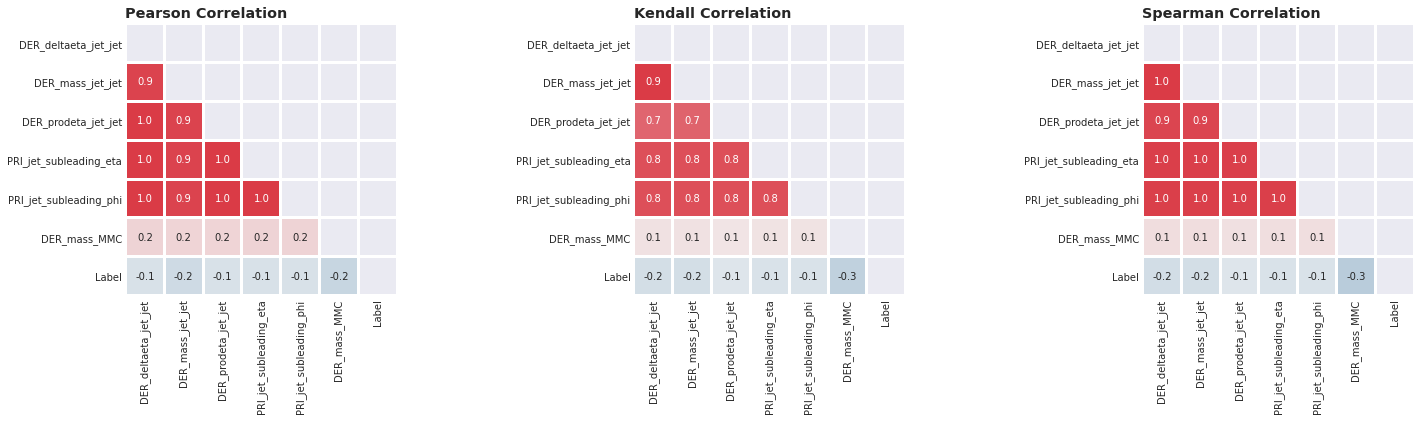

In [ ]:
# kendall
fig, ax = plt.subplots(1, 3, figsize=(23 , 5))

feature_lst = ['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet','PRI_jet_subleading_eta','PRI_jet_subleading_phi', 'DER_mass_MMC', 'Label']

corr = Higgs[feature_lst].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(Higgs[feature_lst].corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.1f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     

plt.show()

In [ ]:
higgs_select=higgs[["DER_sum_pt","PRI_met_sumet","Label"]]
sns.pairplot(higgs_select, hue="Label").fig.suptitle('Without Log Transformation')
plt.show()

x = higgs_select["DER_sum_pt"].apply(np.log)
y = higgs_select["PRI_met_sumet"].apply(np.log)
z= higgs_select["Label"]

d = {'DER_sum_pt': x, 'PRI_met_sumet': y,'Label':z}
higgs_new = pd.DataFrame(d)
sns.pairplot(higgs_new, hue="Label").fig.suptitle('With Log Transformation')
plt.show()

#### **4) Feature Engineering**

#### **4.1) Missing Values**

In [ ]:
# Listing Number of missing values by feature column wise
total = Higgs.isnull().sum().sort_values(ascending=False)
total = total[total > 0]
total

Series([], dtype: int64)

In [ ]:
Higgs.isnull().sum().sum()

0

#### **4.2) Outlier**

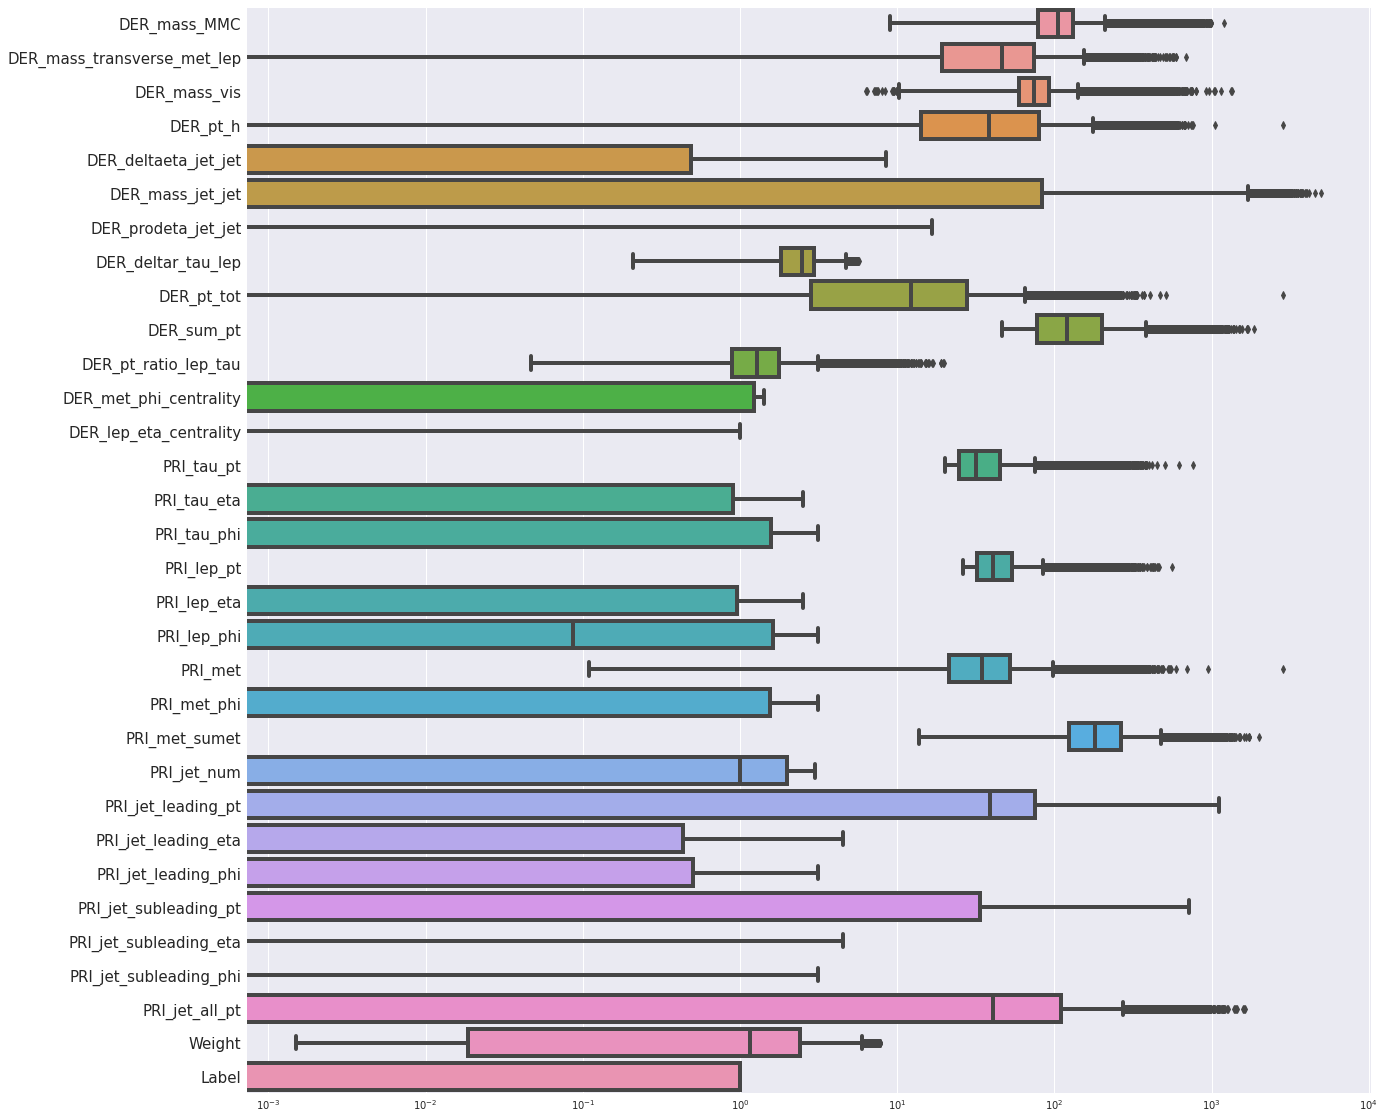

In [12]:
plt.figure(figsize=(18,20))
sns.boxplot(data=Higgs, orient="h")
plt.xscale('log')
plt.yticks(size=15)
plt.show()

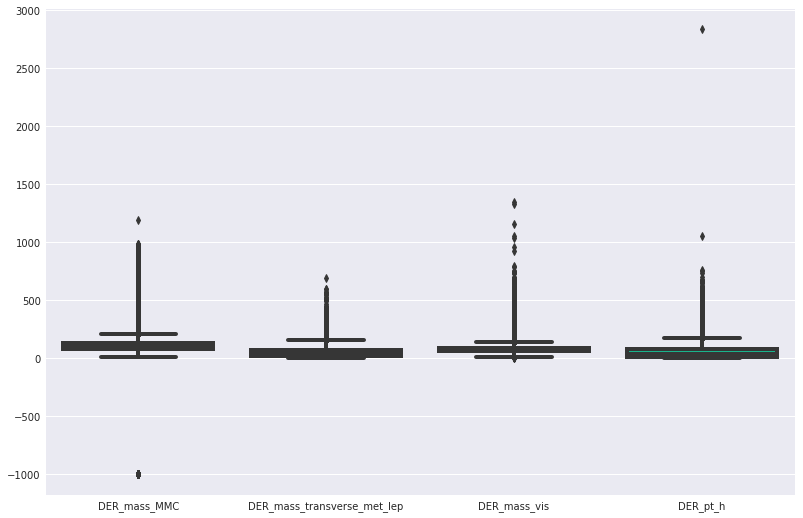

In [16]:
columns = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h']

plt.figure(figsize=(12,9))
sns.boxplot(data = Higgs[columns], palette='winter')

In [56]:
def get_dist(df, col):
  plt.figure(figsize=(18,6))

  plt.subplot(1,3,1)
  plt.hist(df[col], bins=30)
  plt.title('Hist')

  plt.subplot(1,3,2)
  stats.probplot(df[col], dist='norm', plot=plt)
  plt.ylabel('quantiles')

  plt.subplot(1,3,3)
  sns.boxplot(y=df[col])
  plt.title('Boxplot')

  plt.show()  

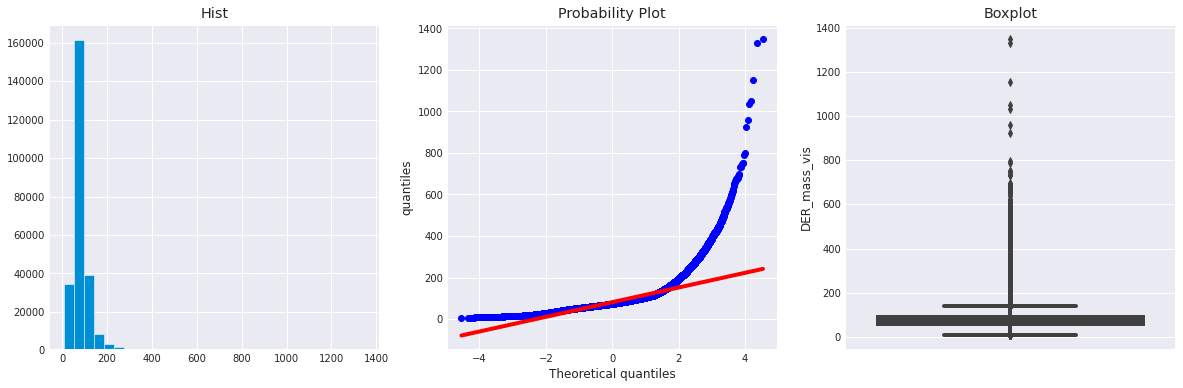

In [59]:
get_dist(Higgs, 'DER_mass_vis')

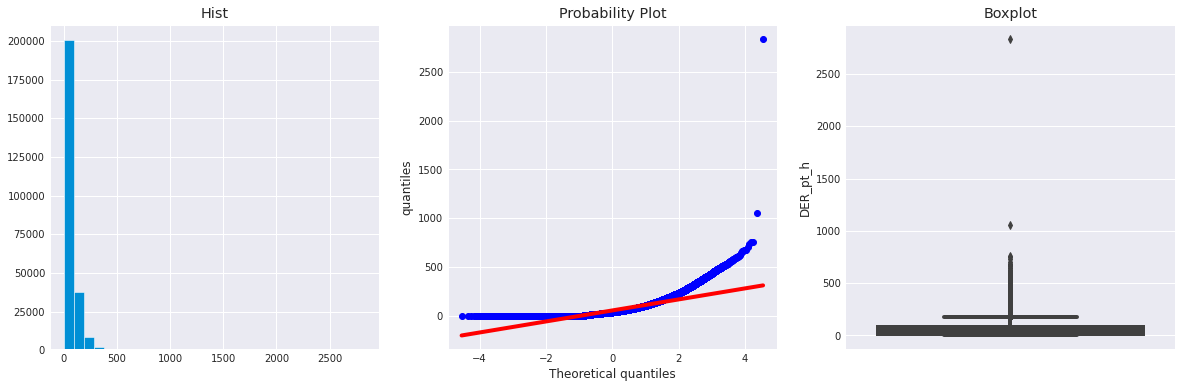

In [60]:
get_dist(Higgs, 'DER_pt_h')

In [44]:
Q1 = Higgs['DER_mass_vis'].quantile(0.25)
Q3 = Higgs['DER_mass_vis'].quantile(0.75)
Q1, Q3

(59.388749999999995, 92.259)

In [45]:
IQR = Q3 - Q1
IQR

32.870250000000006

In [46]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(10.083374999999982, 141.564375)

In [47]:
Higgs[(Higgs['DER_mass_vis']<lower_limit) | (Higgs['DER_mass_vis']>upper_limit)]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
54,219.292,74.600,177.143,2.423,-999.000,-999.000,-999.000,4.054,2.423,71.678,1.841,-1.337,-999.000,25.232,1.099,-2.410,46.447,-2.127,1.419,31.593,-1.263,106.965,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.988256,1
76,239.551,118.683,193.111,6.549,-999.000,-999.000,-999.000,2.857,6.549,181.614,1.246,-1.398,-999.000,80.853,0.563,-1.877,100.761,1.400,0.855,39.990,-3.012,170.842,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,2.108395,1
86,199.900,78.686,167.085,77.236,-999.000,-999.000,-999.000,2.934,17.233,172.545,1.785,-0.112,-999.000,30.651,-0.735,0.131,54.696,2.183,0.439,43.135,2.327,277.402,1,87.198,-2.031,-2.452,-999.000,-999.000,-999.000,87.198,3.080931,1
89,235.976,55.918,175.744,39.662,-999.000,-999.000,-999.000,2.690,3.627,193.940,0.618,-1.101,-999.000,94.921,-0.567,2.080,58.684,0.803,-1.888,68.732,-0.977,290.533,1,40.334,-0.965,0.940,-999.000,-999.000,-999.000,40.334,0.744056,1
105,208.573,6.854,154.336,57.028,2.685,183.753,0.026,3.581,5.646,161.078,2.064,1.362,0.601,20.506,-1.017,0.758,42.329,2.311,-0.563,5.651,-0.116,254.585,2,66.774,0.010,-2.731,31.470,2.695,1.342,98.243,0.744056,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249912,213.533,61.640,154.328,30.378,-999.000,-999.000,-999.000,3.352,3.703,137.256,1.110,1.353,-999.000,50.419,-1.237,2.971,55.953,0.621,0.181,19.251,2.621,195.121,1,30.884,3.559,-1.068,-999.000,-999.000,-999.000,30.884,0.744056,1
249920,178.010,108.122,152.434,42.667,-999.000,-999.000,-999.000,2.896,16.736,149.467,2.807,-1.241,-999.000,30.932,-0.330,-0.510,86.832,-2.352,-2.583,34.377,0.849,250.855,1,31.702,-2.421,0.630,-999.000,-999.000,-999.000,31.702,2.938322,1
249940,421.590,88.923,291.167,43.017,0.502,119.873,3.228,4.846,38.512,230.298,1.202,-1.003,0.000,30.509,-2.267,3.103,36.677,2.044,-0.967,53.899,2.173,274.792,3,96.595,-1.563,-1.000,34.378,-2.065,2.183,163.113,0.744056,1
249967,-999.000,99.862,151.163,73.358,-999.000,-999.000,-999.000,2.842,41.542,183.604,1.257,-1.410,-999.000,67.238,0.806,1.554,84.542,1.152,-1.909,82.912,-0.631,277.199,1,31.824,4.138,2.133,-999.000,-999.000,-999.000,31.824,1.911735,1


In [48]:
Higgs[(Higgs['DER_mass_vis']>lower_limit) & (Higgs['DER_mass_vis']<upper_limit)]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,0
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,1
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,1
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,1
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,1.258,-1.414,-999.0,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,1
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,1.162,-1.345,-999.0,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,1
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,0
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,0.999,1.414,-999.0,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,1


In [49]:
Q11 = Higgs.quantile(0.25)
Q33 = Higgs.quantile(0.75)
Q11, Q33

(DER_mass_MMC                    78.100750
 DER_mass_transverse_met_lep     19.241000
 DER_mass_vis                    59.388750
 DER_pt_h                        14.068750
 DER_deltaeta_jet_jet          -999.000000
 DER_mass_jet_jet              -999.000000
 DER_prodeta_jet_jet           -999.000000
 DER_deltar_tau_lep               1.810000
 DER_pt_tot                       2.841000
 DER_sum_pt                      77.550000
 DER_pt_ratio_lep_tau             0.883000
 DER_met_phi_centrality          -1.371000
 DER_lep_eta_centrality        -999.000000
 PRI_tau_pt                      24.591750
 PRI_tau_eta                     -0.925000
 PRI_tau_phi                     -1.575000
 PRI_lep_pt                      32.375000
 PRI_lep_eta                     -1.014000
 PRI_lep_phi                     -1.522000
 PRI_met                         21.398000
 PRI_met_phi                     -1.575000
 PRI_met_sumet                  123.017500
 PRI_jet_num                      0.000000
 PRI_jet_le

In [50]:
IQR1 = Q33-Q11
print(IQR1)

DER_mass_MMC                     52.505500
DER_mass_transverse_met_lep      54.357000
DER_mass_vis                     32.870250
DER_pt_h                         65.100250
DER_deltaeta_jet_jet            999.490000
DER_mass_jet_jet               1082.446000
DER_prodeta_jet_jet             994.407000
DER_deltar_tau_lep                1.151000
DER_pt_tot                       24.750000
DER_sum_pt                      122.928250
DER_pt_ratio_lep_tau              0.894000
DER_met_phi_centrality            2.596000
DER_lep_eta_centrality          999.000000
PRI_tau_pt                       20.425250
PRI_tau_eta                       1.823000
PRI_tau_phi                       3.140000
PRI_lep_pt                       21.015000
PRI_lep_eta                       1.973000
PRI_lep_phi                       3.140000
PRI_met                          30.497000
PRI_met_phi                       3.136000
PRI_met_sumet                   140.361750
PRI_jet_num                       2.000000
PRI_jet_lea

In [54]:
lower_limit1 = Q11-3*IQR1
upper_limit1 = Q33+3*IQR1
lower_limit1, upper_limit1

(DER_mass_MMC                    -79.415750
 DER_mass_transverse_met_lep    -143.830000
 DER_mass_vis                    -39.222000
 DER_pt_h                       -181.232000
 DER_deltaeta_jet_jet          -3997.470000
 DER_mass_jet_jet              -4246.338000
 DER_prodeta_jet_jet           -3982.221000
 DER_deltar_tau_lep               -1.643000
 DER_pt_tot                      -71.409000
 DER_sum_pt                     -291.234750
 DER_pt_ratio_lep_tau             -1.799000
 DER_met_phi_centrality           -9.159000
 DER_lep_eta_centrality        -3996.000000
 PRI_tau_pt                      -36.684000
 PRI_tau_eta                      -6.394000
 PRI_tau_phi                     -10.995000
 PRI_lep_pt                      -30.670000
 PRI_lep_eta                      -6.933000
 PRI_lep_phi                     -10.942000
 PRI_met                         -70.093000
 PRI_met_phi                     -10.983000
 PRI_met_sumet                  -298.067750
 PRI_jet_num                    

In [55]:
# Outlier rows
Higgs[(Higgs<lower_limit1) | (Higgs>upper_limit1)]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249996,-999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# After deleting outlier rows
Higgs[(Higgs>lower_limit1) & (Higgs<upper_limit1)]
# Higgs[~((Higgs>lower_limit1) & (Higgs<upper_limit1)).any(axis=1)]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,0
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,1
2,NaN,NaN,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,NaN,1.414,-999.0,32.154,-0.705,-2.093,NaN,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,1
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,1
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,NaN,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,1.258,-1.414,-999.0,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,1
249996,NaN,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,1.162,-1.345,-999.0,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,1
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,0
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,0.999,1.414,-999.0,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,1


#### **4.3) Feature Selection**
- Extratrees Classifier

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.05067702 0.02950321 0.02597519 0.01072939 0.01093464 0.00987603
 0.0081163  0.02196311 0.01078252 0.01069133 0.01613547 0.03565703
 0.01761849 0.01713678 0.00802898 0.00608176 0.0086742  0.00899366
 0.00625287 0.01151959 0.0060786  0.00853954 0.01006841 0.00715772
 0.01029343 0.00763058 0.00468982 0.00458076 0.00394171 0.0068496
 0.60482228]


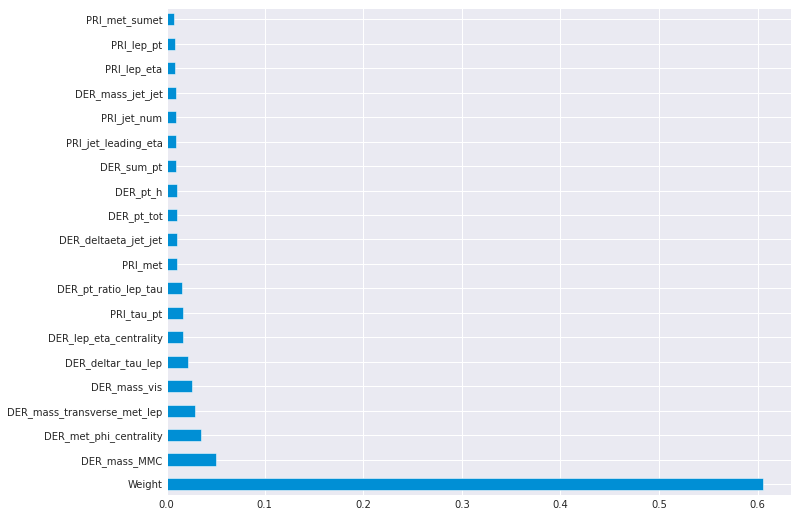

In [65]:
plt.figure(figsize=(10,9))
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

### **6) Modelling** 

In [61]:
X = Higgs.drop('Label', axis=1)
y = Higgs['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200000, 21)
(200000,)
(50000, 21)
(50000,)


### **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Oversampling the train dataset using SMOTE
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('Before', counter)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({1: 131462, 0: 68538})
After Counter({1: 131462, 0: 131462})


### **Hybridization: SMOTE + Tomek Links**

- Hybridization techniques involve combining **both undersampling and oversampling techniques.** This is done to optimize the performance of classifier models for the samples created as part of these techniques.

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)

X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('Before', counter)

counter = Counter(y_train_smtom)
print('After', counter)

Before Counter({1: 131462, 0: 68538})
After Counter({1: 127774, 0: 127774})


#### **6.1) Random Forest**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rfc)

In [ ]:
print("Random Forest : Train Score {:.2f} & Test Score {:.2f}".format(rfc.score(X_train, y_train), rfc.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n",confusion_matrix(y_test, y_pred_rfc))
print('-'*70)
print("\n\nClassification Report\n\n",classification_report(y_test, y_pred_rfc))

Random Forest : Train Score 1.00 & Test Score 1.00
----------------------------------------------------------------------


Confusion matrix 

 [[17129     0]
 [    0 32871]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17129
           1       1.00      1.00      1.00     32871

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



No handles with labels found to put in legend.


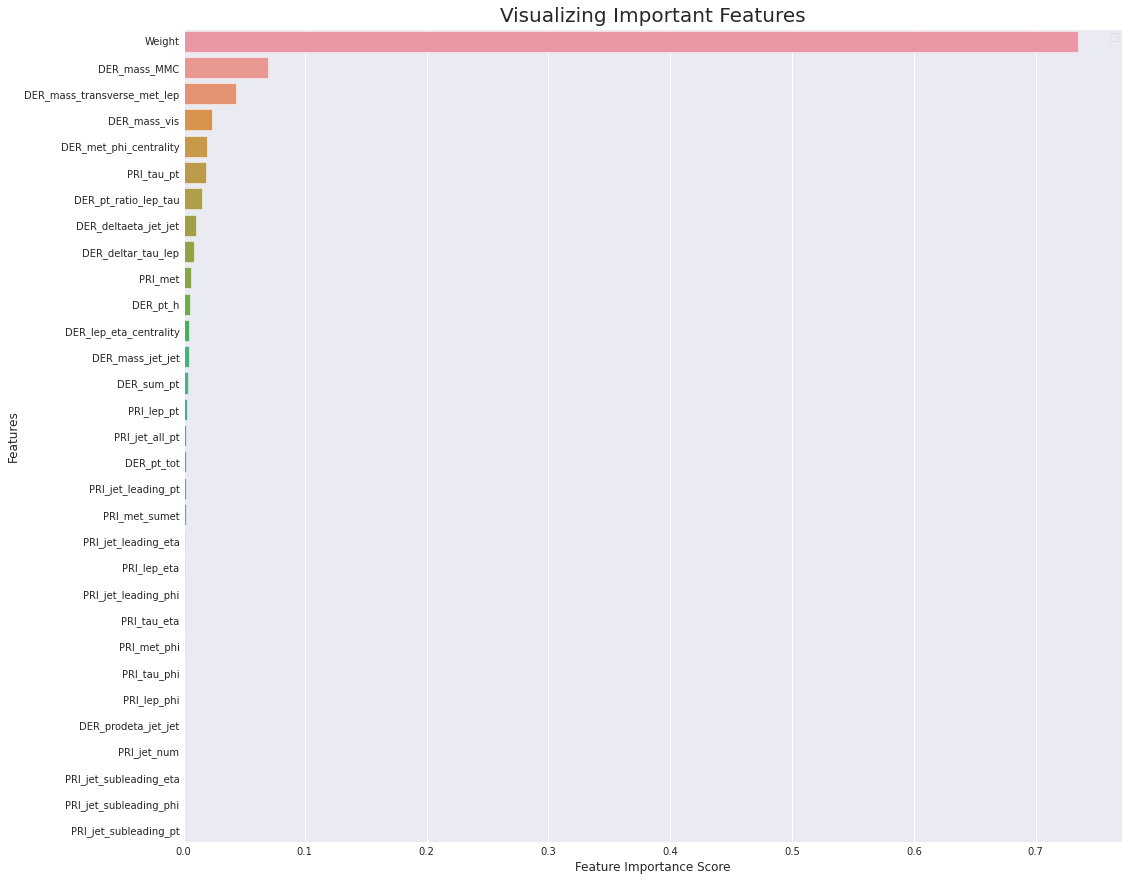

In [ ]:
plt.figure(figsize=(15,15))
feature_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", size=20)
plt.legend()
plt.show()

In [ ]:
import pickle
pickle.dump(rfc, open("rfc.pkl", 'wb'))

#### **6.2) XGBoost**

In [ ]:
xgb1 = XGBClassifier()
xgb1.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions for test set
y_pred_xgb1 = xgb1.predict(X_test)
predictions = [round(value) for value in y_pred_xgb1]

ValueError: ignored

In [ ]:
print("XGBoost : Train Score {:.2f} & Test Score {:.2f}".format(xgb1.score(X_train, y_train), xgb1.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n", confusion_matrix(y_test, y_pred_xgb1))
print('-'*70)
print("\n\nClassification Report\n\n", classification_report(y_test, y_pred_xgb1))

XGBoost : Train Score 1.00 & Test Score 1.00
----------------------------------------------------------------------


Confusion matrix 

 [[17129     0]
 [    0 32871]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17129
           1       1.00      1.00      1.00     32871

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



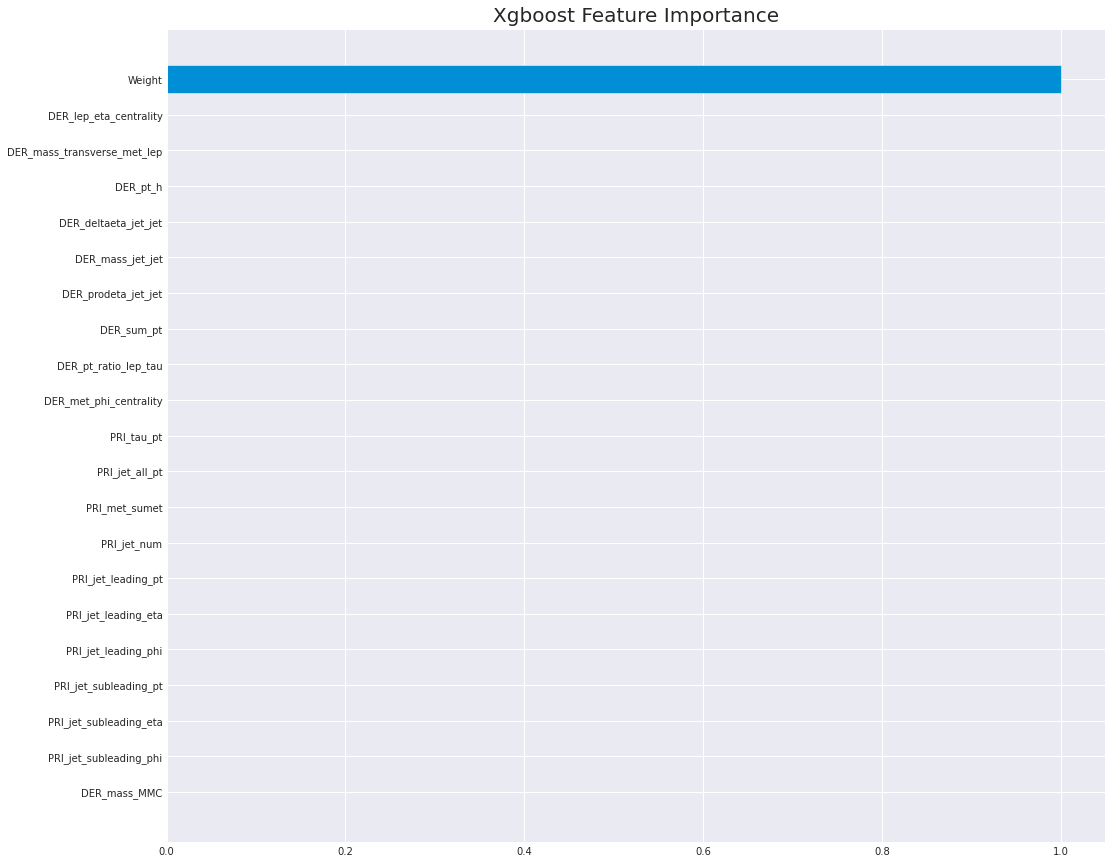

In [ ]:
plt.figure(figsize=(15,15))
sorted_idx = xgb1.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb1.feature_importances_[sorted_idx]);
plt.title("Xgboost Feature Importance", size=20)
plt.show()

#### **6.3) LGBM**

In [ ]:
LGB = LGBMClassifier()
LGB.fit(X_train_smtom, y_train_smtom)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred_LGB = LGB.predict(X_test)

In [ ]:
print("XGBoost : Train Score {:.2f} & Test Score {:.2f}".format(LGB.score(X_train_smtom, y_train_smtom), LGB.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n",confusion_matrix(y_test, y_pred_LGB))
print('-'*70)
print("\n\nClassification Report\n\n",classification_report(y_test, y_pred_LGB))

XGBoost : Train Score 1.00 & Test Score 1.00
----------------------------------------------------------------------


Confusion matrix 

 [[17129     0]
 [    0 32871]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17129
           1       1.00      1.00      1.00     32871

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



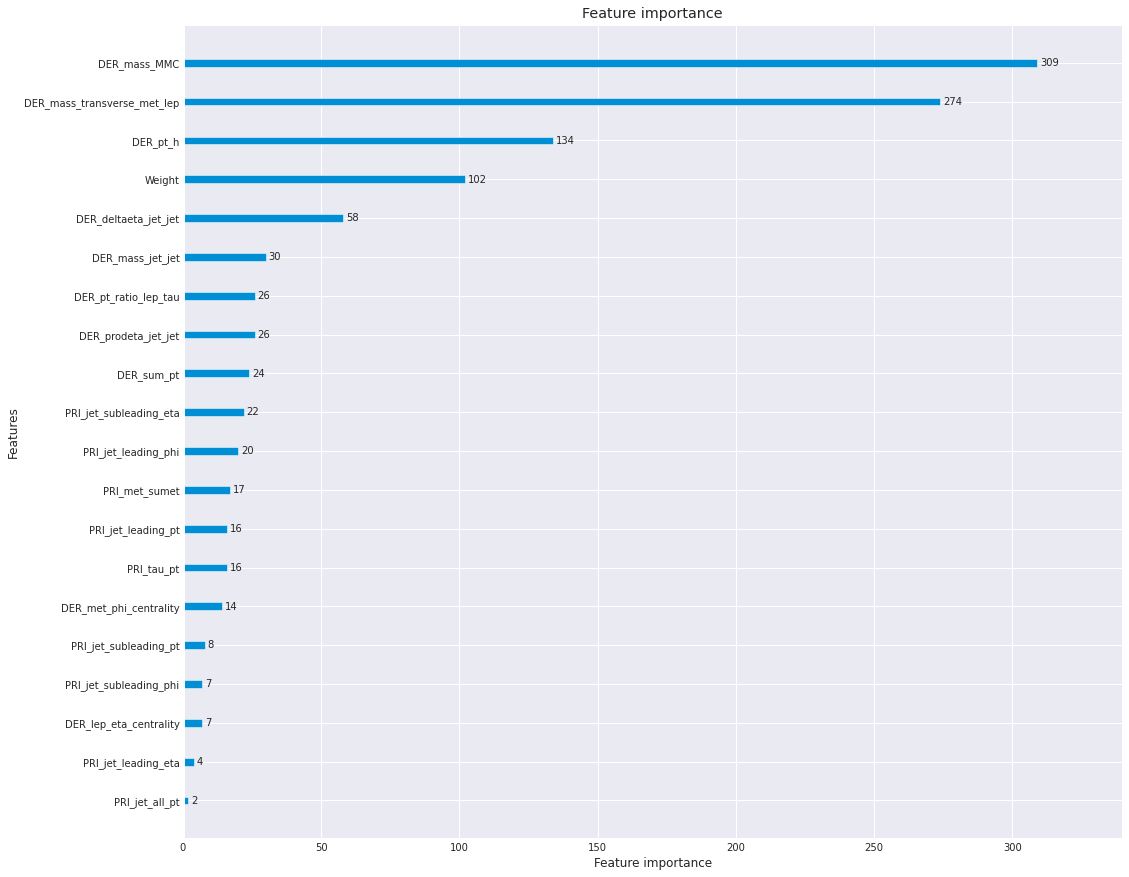

In [ ]:
plot_importance(LGB, figsize=(15, 15));

#### **6.4) KNN**

In [ ]:
for i in range(3,15,3):
    
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    y_pred_KNN = KNN.predict(X_test)

    # accuracy
    KNN_acc = accuracy_score(y_test, y_pred_KNN)

    print("kneighbors {}".format(i))
    print("\nKNeighborsClassifier : Train Score {:.2f} & Test Score {:.2f}".format(KNN.score(X_train, y_train), KNN.score(X_test, y_test)))
    print('-'*70)
    print("\n\nConfusion matrix: \n\n",confusion_matrix(y_test, y_pred_KNN))
    print('-'*70)
    print("\n\nClassification Report: \n\n", classification_report(y_pred_KNN, y_test, labels=None))
    print('-'*70)
    print("\n\ncohen kappa score: \n\n", cohen_kappa_score(y_test, y_pred_KNN))
    print('*'*70)
    print("\n\n")

kneighbors 3

KNeighborsClassifier : Train Score 0.89 & Test Score 0.80
----------------------------------------------------------------------


Confusion matrix: 

 [[11938  5191]
 [ 4849 28022]]
----------------------------------------------------------------------


Classification Report: 

               precision    recall  f1-score   support

           0       0.70      0.71      0.70     16787
           1       0.85      0.84      0.85     33213

    accuracy                           0.80     50000
   macro avg       0.77      0.78      0.78     50000
weighted avg       0.80      0.80      0.80     50000

----------------------------------------------------------------------


cohen kappa score: 

 0.5520700514184498
**********************************************************************



kneighbors 6

KNeighborsClassifier : Train Score 0.85 & Test Score 0.80
----------------------------------------------------------------------


Confusion matrix: 

 [[13182  3947]
 [ 5984 

#### **AUC-ROC CURVE**

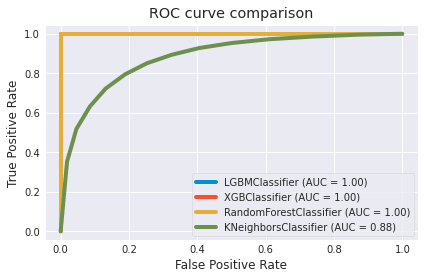

In [ ]:
# AUC-ROC Curve
#plt.figure(figsize=(7,5))
from sklearn.metrics import plot_roc_curve
m1_roc = plot_roc_curve(LGB, X_test, y_test)
plot_roc_curve(xgb1, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(rfc, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(KNN, X_test, y_test, ax = m1_roc.ax_)
#plot_roc_curve(NB, X_test, y_test, ax = m1_roc.ax_)

plt.title("ROC curve comparison")
plt.show()

#### **10) Model Explainability (Explainable AI)**

#### **Lime**

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=41f76486714134cf051e160c66095fd36d0ccb11e33f094b9687b5668a1440f7
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

In [ ]:
exp = interpretor.explain_instance(
    data_row = X_test.iloc[10], ##new data
    predict_fn = rfc.predict_proba
)

exp.show_in_notebook(show_table=True)

#### **SHAP**

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(LGB)
shap_values = explainer(X)

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

Exception: ignored

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(LGB)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

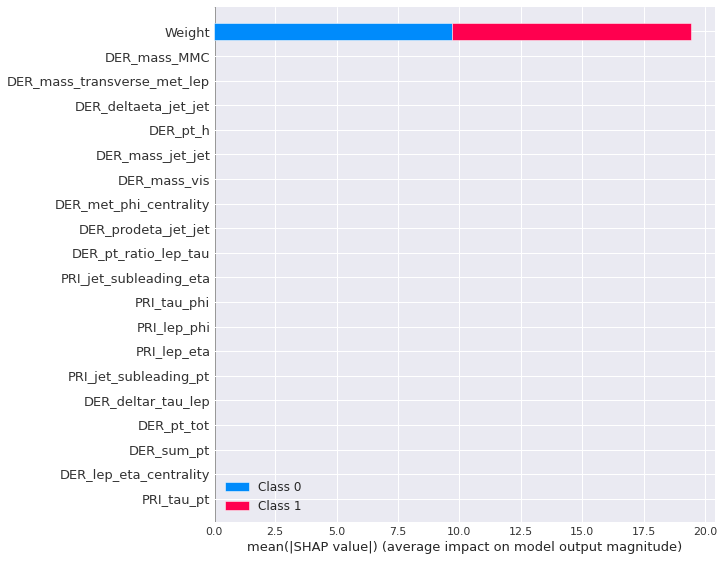

In [ ]:
# SHAP Feature importance
shap.summary_plot(shap_values, X_train, feature_names=Higgs.columns, plot_type="bar")

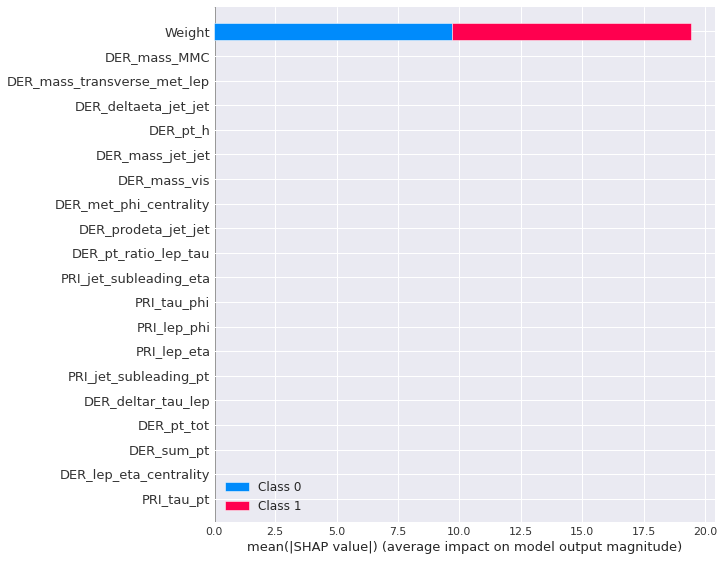

In [ ]:
# SHAP Summary Plot
shap.summary_plot(shap_values, X_train, feature_names=Higgs.columns)

In [ ]:
# SHAP Dependence Plot
shap.dependence_plot(5, shap_values, X_train, feature_names=Higgs.columns)

TypeError: ignored

In [ ]:
i = 18
shap.force_plot(explainer.expected_value, shap_values[i], X_test[i], feature_names = Higgs.columns)

IndexError: ignored

### **REFERENCE**

- https://github.com/cbracher69/Kaggle-Higgs-Boson-Challenge/blob/master/Higgs%20Linear-Gaussian%20Model%20Archive.ipynb

- https://www.kaggle.com/imeintanis/identifying-higgs-boson-t-sne-umap-rapids

#### **SHAP**

- https://towardsdatascience.com/explainable-ai-xai-with-shap-regression-problem-b2d63fdca670

- https://github.com/slundberg/shap

- https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html